In [1]:
import pandas as pd

Iris 데이터셋 로드
- 꽃 종류 분류하기

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

- `DESCR` : 데이터셋의 정보를 보여줍니다. <br>
- `data` : feature data.<br>
- `feature_names` : feature data의 컬럼 이름<br>
- `target` : label data (수치형)<br>
- `target_names` : label의 이름 (문자형)<br>

In [3]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
data = iris['data']
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

- sepal 꽃 받침
- petal 꽃 잎

In [6]:
target = iris['target']
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df_iris = pd.DataFrame(data, columns=feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df_iris['target'] = target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


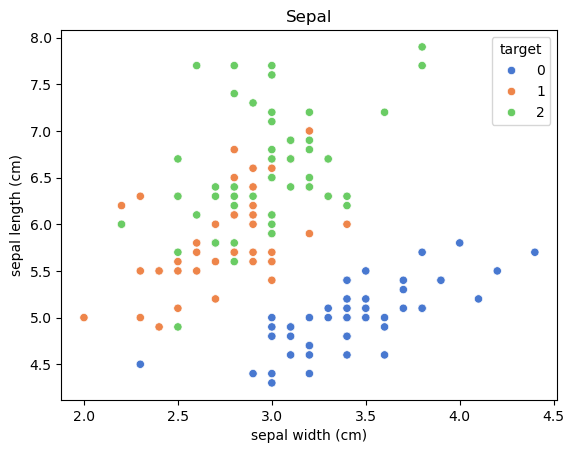

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x='sepal width (cm)', y='sepal length (cm)', hue='target', palette='muted', data=df_iris )
plt.title('Sepal')
plt.show()

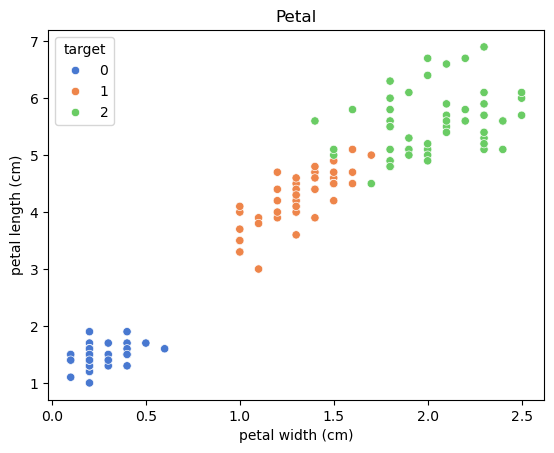

In [11]:
sns.scatterplot(x='petal width (cm)', y='petal length (cm)', hue='target', palette='muted', data=df_iris)
plt.title('Petal')
plt.show()

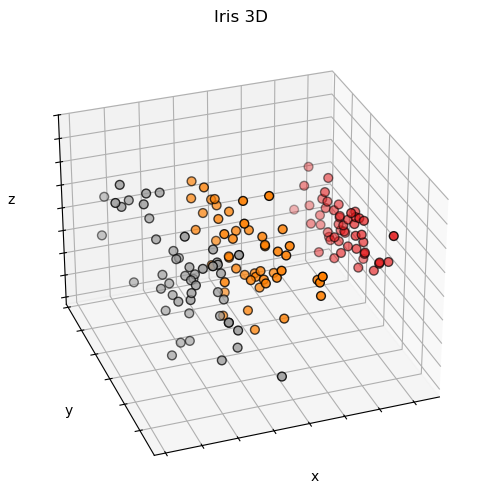

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

#그림 판 크기 설정
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d') #3d출력
ax.view_init(elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(df_iris.drop('target', axis=1))
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=df_iris['target'],
						cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title("Iris 3D")
ax.set_xlabel("x")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("y")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("z")
ax.zaxis.set_ticklabels([])
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(df_iris.drop('target', axis=1), df_iris['target'])

In [14]:
X_train.shape, y_train.shape

((112, 4), (112,))

In [15]:
X_valid.shape, y_valid.shape

((38, 4), (38,))

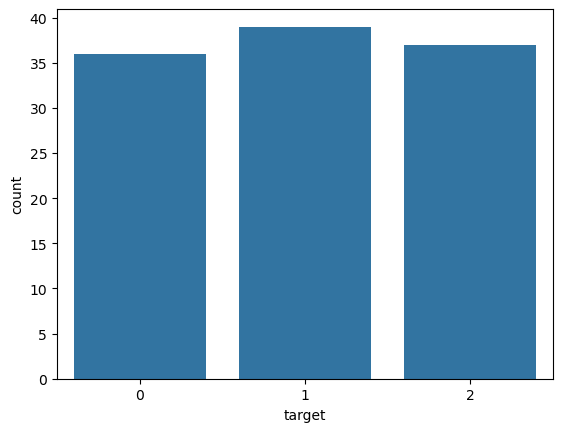

In [16]:
sns.countplot(x=y_train)
plt.show()

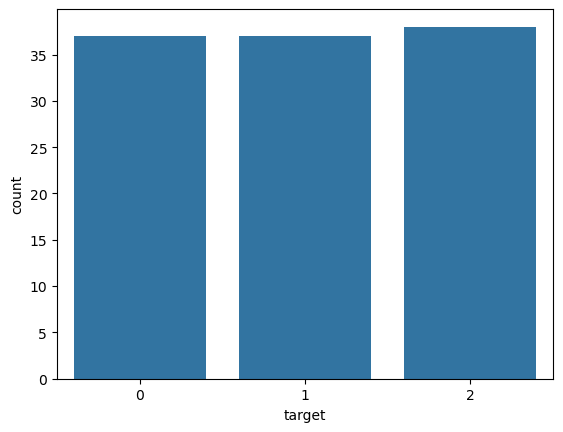

In [17]:
X_train, X_valid, y_train, y_ = train_test_split(df_iris.drop('target', axis=1), df_iris['target'], stratify=df_iris['target'])
sns.countplot(x=y_train)
plt.show()

##  Logistic Regression
- 로지스틱 회귀(영어: logistic regression)는 영국의 통계학자인 D. R. Cox가 1958년에 제안한 확률 모델
- 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법<br>
<br>
LogisticRegression, 서포트 벡터 머신 (SVM) 과 같은 알고리즘은 이진 분류만 가능합니다. (2개의 클래스 판별만 가능합니다.)하지만, 3개 이상의 클래스에 대한 판별을 진행하는 경우, 다음과 같은 전략으로 판별하게 됩니다.

- one-vs-rest (OvR): K 개의 클래스가 존재할 때, 1개의 클래스를 제외한 다른 클래스를 K개 만들어, 각각의 이진 분류에 대한 확률을 구하고, 총합을 통해 최종 클래스를 판별
- one-vs-one (OvO): 4개의 계절을 구분하는 클래스가 존재한다고 가정했을 때, 0vs1, 0vs2, 0vs3, ... , 2vs3 까지 NX(N-1)/2 개의 분류기를 만들어 가장 많이 양성으로 선택된 클래스를 판별
<br>
대부분 OvsR 전략을 선호합니다.

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [19]:
model.fit(X_train, y_train)

c:\ProgramData\anaconda3\envs\conda_env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
prediction = model.predict(X_valid)
prediction[:5]

array([2, 0, 0, 1, 0])

In [21]:
(prediction == y_valid).mean()

0.2894736842105263

## SGDClassifier
- stochastic gradient descent (SGD): 확률적 경사 하강법

In [22]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=5)

In [23]:
sgd.fit(X_train, y_train)

SGDClassifier(random_state=5)

In [24]:
prediction = sgd.predict(X_valid)

In [25]:
(prediction == y_valid).mean()

0.39473684210526316

## 하이퍼 파라미터 (hyper-parameter) 튜닝
- 알고리즘 별, hyper-parameter의 종류가 다양합니다.
- random_state: 하이퍼 파라미터 튜닝시, 고정할 것
- n_jobs=-1: CPU를 모두 사용 (학습속도가 빠름)

In [26]:
sgd = SGDClassifier(penalty='l1', random_state=0, n_jobs=-1)
sgd.fit(X_train, y_train)

SGDClassifier(n_jobs=-1, penalty='l1', random_state=0)

In [27]:
prediction = sgd.predict(X_valid)
(prediction == y_valid).mean()

0.3157894736842105

## KNeighborsClassifier
최근접 이웃 알고리즘

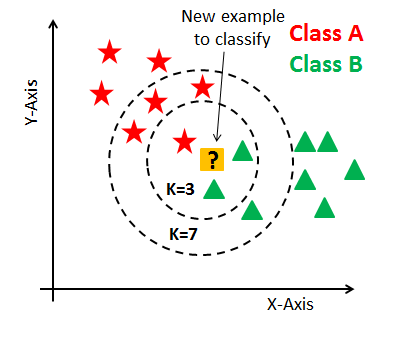

In [28]:
from IPython.display import Image
# 출처: 데이터 캠프
Image('https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png')

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

In [30]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [31]:
knc_pred = knc.predict(X_valid)

In [32]:
(knc_pred == y_valid).mean()

0.2894736842105263

In [37]:
kcn = KNeighborsClassifier(n_neighbors=9, n_jobs=-1)
kcn.fit(X_train, y_train)
kcn_pred = knc.predict(X_valid)

In [38]:
(kcn_pred == y_valid).mean()

0.2894736842105263

## 서포트 벡터 머신 (SVC)
- 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만듦.
- 경계로 표현되는 데이터들 중 가장 큰 폭을 가진 경계를 찾는 알고리즘

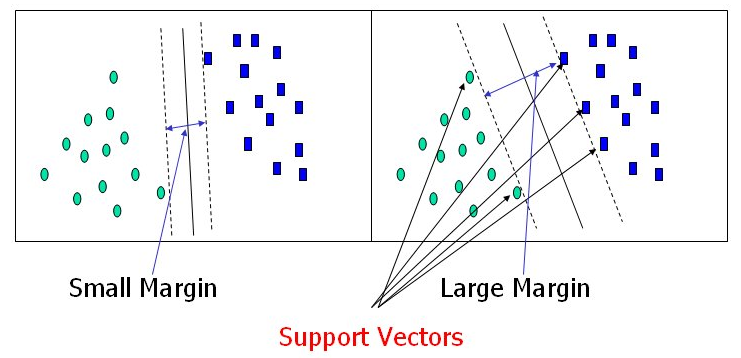

In [35]:
Image('https://csstudy.files.wordpress.com/2011/03/screen-shot-2011-02-28-at-5-53-26-pm.png')

LogisticRegression과 같이 이진 분류만 가능. (2개의 클래스 판별만 가능합니다.)
- OvsR 전략 사용

In [36]:
from sklearn.svm import SVC

svc = SVC(random_state=0,)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_valid)

In [39]:
svc

SVC(random_state=0)

In [40]:
(svc_pred == y_valid).mean()

0.3157894736842105

In [41]:
svc_pred[:5]

array([2, 0, 0, 1, 0])

In [42]:
#클래스 별 확률값을 return 해주는 메서드
svc.decision_function(X_valid)[:5]

array([[-0.23493691,  1.12247281,  2.21457553],
       [ 2.2339176 ,  1.15751566, -0.2548803 ],
       [ 2.22592626,  1.17873412, -0.25507819],
       [-0.21979515,  2.2156146 ,  1.03147248],
       [ 2.23235144,  1.15879636, -0.25417062]])

## 의사 결정 나무 (Decision Tree)
스무고개처럼, 나무 가지치기를 통해 소그룹으로 나누어 판별하는 것

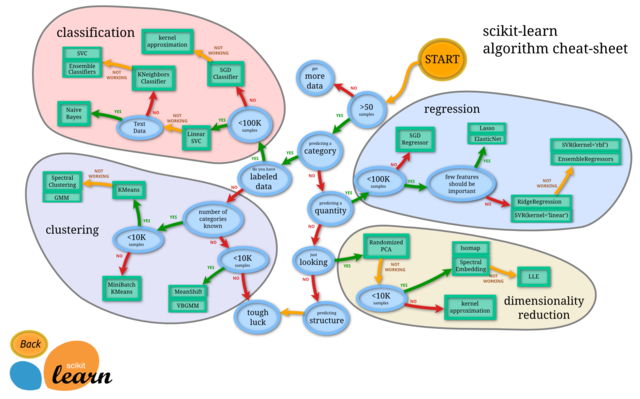

In [44]:
Image('https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Scikit-learn_machine_learning_decision_tree.png/640px-Scikit-learn_machine_learning_decision_tree.png')


In [45]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=8)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=8)

In [46]:
dtc_pred = dtc.predict(X_valid)
(dtc_pred == y_valid).mean()

0.3157894736842105

## 오차 (Error)
정확도의 함정

In [49]:
#유방암 환자의 데이터셋 로드
# target: 0: 악성종양, 1:양성종양
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

In [50]:
cancer = load_breast_cancer()
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [56]:
data = cancer['data']
target = cancer['target']
feature_names = cancer['feature_names']

In [61]:
df = pd.DataFrame(data=data, columns=feature_names)
df['target'] = target

In [74]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [63]:
pos = df.loc[df['target'] == 1]
neg = df.loc[df['target'] == 0]

In [75]:
pos

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,1
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,1
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,1
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,1


In [76]:
neg

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820,0


In [ ]:
#악성의 비율을 낮게 설정 -- 거의 다 음성
sample = pd.concat([pos,neg[:5]], sort=True)
sample

,area error,compactness error,concave points error,concavity error,fractal dimension error,mean area,mean compactness,mean concave points,mean concavity,mean fractal dimension,...,worst area,worst compactness,worst concave points,worst concavity,worst fractal dimension,worst perimeter,worst radius,worst smoothness,worst symmetry,worst texture
19,23.560,0.014600,0.013150,0.02387,0.002300,566.3,0.08129,0.047810,0.06664,0.05766,...,711.2,0.17730,0.12880,0.23900,0.07259,99.70,15.110,0.14400,0.2977,19.26
20,14.670,0.018980,0.006490,0.01698,0.002425,520.0,0.12700,0.031100,0.04568,0.06811,...,630.5,0.27760,0.07283,0.18900,0.08183,96.09,14.500,0.13120,0.3184,20.49
21,15.700,0.014320,0.014210,0.01985,0.002968,273.9,0.06492,0.020760,0.02956,0.06905,...,314.9,0.11480,0.06227,0.08867,0.07773,65.13,10.230,0.13240,0.2450,15.66
37,14.160,0.004899,0.011640,0.01343,0.001777,523.8,0.03766,0.029230,0.02562,0.05863,...,545.9,0.04619,0.05013,0.04833,0.06169,84.46,13.300,0.09701,0.1987,22.81
46,8.205,0.016460,0.005917,0.01588,0.002582,201.9,0.05943,0.005917,0.01588,0.06503,...,242.2,0.13570,0.02564,0.06880,0.07409,57.26,8.964,0.12970,0.3105,21.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,153.400,0.049040,0.015870,0.05373,0.006193,1001.0,0.27760,0.147100,0.30010,0.07871,...,2019.0,0.66560,0.26540,0.71190,0.11890,184.60,25.380,0.16220,0.4601,17.33
1,74.080,0.013080,0.013400,0.01860,0.003532,1326.0,0.07864,0.070170,0.08690,0.05667,...,1956.0,0.18660,0.18600,0.24160,0.08902,158.80,24.990,0.12380,0.2750,23.41
2,94.030,0.040060,0.020580,0.03832,0.004571,1203.0,0.15990,0.127900,0.19740,0.05999,...,1709.0,0.42450,0.24300,0.45040,0.08758,152.50,23.570,0.14440,0.3613,25.53
3,27.230,0.074580,0.018670,0.05661,0.009208,386.1,0.28390,0.105200,0.24140,0.09744,...,567.7,0.86630,0.25750,0.68690,0.17300,98.87,14.910,0.20980,0.6638,26.50


In [78]:
'target' in sample.columns 

True

In [89]:
X_train, X_test, y_train, y_test = train_test_split(sample.drop('target', axis=1), sample['target'], random_state=42)

In [90]:
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

c:\ProgramData\anaconda3\envs\conda_env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
(pred == y_test).mean()

0.978021978021978

In [92]:
my_prediction = np.ones(shape=y_test.shape)
(my_prediction == y_test).mean()

0.989010989010989

## 오차 행렬 (confusion maxtix)

In [93]:
from sklearn.metrics import confusion_matrix

In [94]:
confusion_matrix(y_test, pred)

array([[ 1,  0],
       [ 2, 88]], dtype=int64)

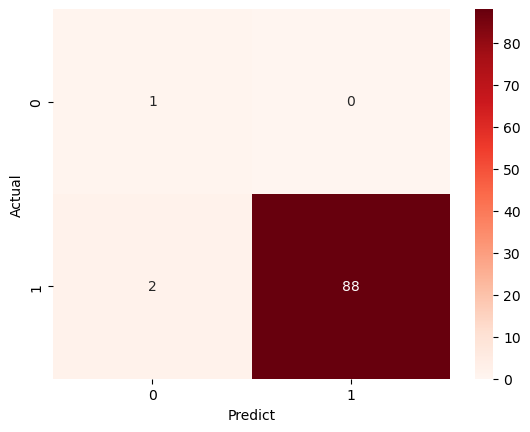

In [95]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='Reds')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

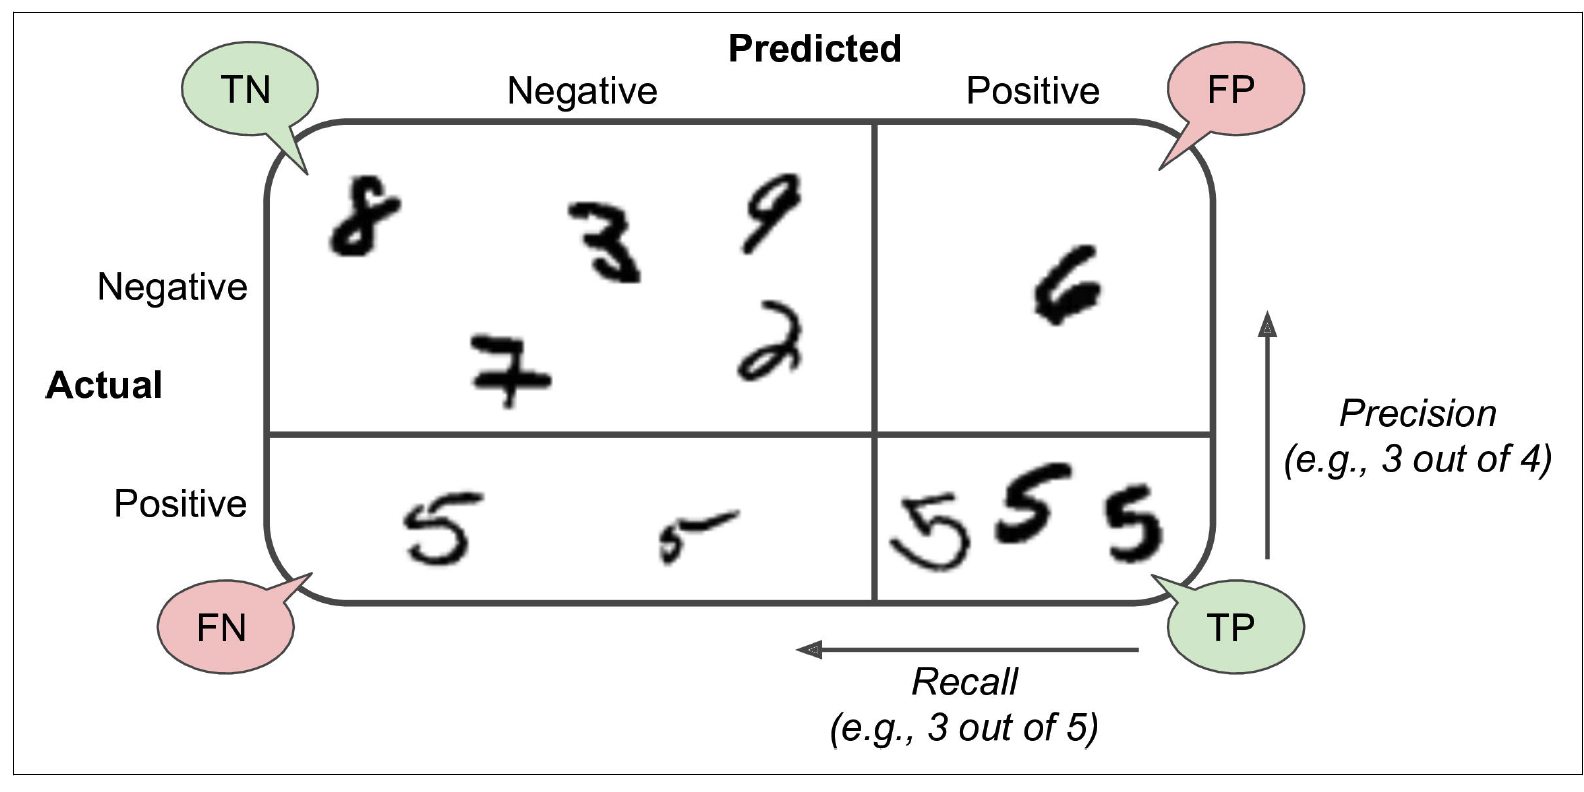

In [99]:
Image('https://dojinkimm.github.io/assets/imgs/ml/handson_3_1.png', width=600)

In [100]:
from sklearn.metrics import precision_score, recall_score

## 정밀도 (precision)
- 양성 예측 정확도
- TP / (TP + FP)

In [102]:
#무조건 양성으로 판단하면 좋은 정밀도를 얻지만 유용하지 않다.
precision_score(y_test, pred)

1.0

## 재현율 (recall)
- TP / (TP + FN)
- 민감도 (sensitivity) 혹은 True Positive Rate (TPR)이라고도 한다.

In [103]:
recall_score(y_test, pred)

0.9777777777777777

##  F1 score
정밀도와 재현율의 조화 평균을 나타내는 지표 <br>
<br>
$$2* \frac{정밀도 * 재현율}{정밀도 + 재현율} = \frac {TP}{TP + \frac{FN+FP}{2}}$$

In [104]:
from sklearn.metrics import f1_score
f1_score(y_test, pred)

0.9887640449438202